# Project 2
## Parisa Gandomkar Yarandi
### December 2016

## Agenda: 

### What is the problem?
#### The Iowa State legislature is considering changes in the liquor tax rates and wants a report of current liquor sales by county and projections for the rest of the year.



## What is the solution?


# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import pandas as pd
import patsy

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV



# Import data (10%)

In [2]:
data_store = pd.read_csv('/Users/generalassembly/Desktop/Iowa_Liquor_sales_sample_10pct.csv')
data_test = pd.read_csv('/Users/generalassembly/Desktop/Iowa_Liquor_sales_sample_10pct.csv')


In [3]:
# info about datasets
data_store.shape

(270955, 18)

In [4]:
# info about datasets
data_store.head()


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [5]:
# Drop unnecessary column
data_test= data_test.drop(['County Number'], axis=1)



In [6]:
data_test.shape

(270955, 17)

In [7]:
# rename the columns

data_test.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [8]:
#Refine Date

data_test['Seprate_date']=pd.to_datetime(data_test['Date'])

In [9]:
# number of total NAN
%timeit 

data_test.isnull().values.sum()

1777

In [10]:
#which columns have NAN in the test data
data_test.isnull().any()


Date                     False
Store_Number             False
City                     False
Zip_Code                 False
County                    True
Category                  True
Category_Name             True
Vendor_Number            False
Item_Number              False
Item_Description         False
Bottle_Volume_(ml)       False
State_Bottle_Cost        False
State_Bottle_Retail      False
Bottles_Sold             False
Sale_(Dollars)           False
Volume_Sold_(Liters)     False
Volume_Sold_(Gallons)    False
Seprate_date             False
dtype: bool

In [11]:
#number of NAN in each column (test data)
data_test.isnull().sum()

Date                        0
Store_Number                0
City                        0
Zip_Code                    0
County                   1077
Category                   68
Category_Name             632
Vendor_Number               0
Item_Number                 0
Item_Description            0
Bottle_Volume_(ml)          0
State_Bottle_Cost           0
State_Bottle_Retail         0
Bottles_Sold                0
Sale_(Dollars)              0
Volume_Sold_(Liters)        0
Volume_Sold_(Gallons)       0
Seprate_date                0
dtype: int64

# Cleaning Data

In [ ]:
# create new copies 
import copy
df_test = copy.deepcopy(data_test)
df_test.head()

In [ ]:
# Drop NA and duplicated
df_test_drop = df_test.dropna()
df_test_drop_duplicated=df_test_drop.sort('City').drop_duplicates(subset=['City'], take_last=True)

In [16]:
#Create a Dictionary Key:City Value:County
dic_data_city = dict(zip(df_test_drop_duplicated['City'], df_test_drop_duplicated['County'])) 

In [ ]:
# fill NAN. if the county missing, look up the dictionary and find the value for the  city
df_test.County = df_test.County.fillna(df_test['City'].map(dic_data_city))
df_test.head()

In [ ]:
# test to check how dictionary works (198 was NAN)
df_test['County'][190:200]

In [20]:
df_test.isnull().sum()

Date                       0
Store_Number               0
City                       0
Zip_Code                   0
County                    12
Category                  68
Category_Name            632
Vendor_Number              0
Item_Number                0
Item_Description           0
Bottle_Volume_(ml)         0
State_Bottle_Cost          0
State_Bottle_Retail        0
Bottles_Sold               0
Sale_(Dollars)             0
Volume_Sold_(Liters)       0
Volume_Sold_(Gallons)      0
Seprate_date               0
dtype: int64

# make a second dictionary

In [ ]:
# Drop NA and duplicated
df_test_drop_duplicated2=df_test_drop.sort('Category').drop_duplicates(subset=['Category'], take_last=True)

In [22]:
#Create a Dictionary Key:Category Value:Category_name
dic_data_Category = dict(zip(df_test_drop_duplicated2['Category'], df_test_drop_duplicated2['Category_Name'])) 

In [23]:
# find a value base on ey in the dictionary
dic_data_Category.get(1082100.0)

In [ ]:
# fill NAN. if the county missing, look up the dictionary and find the value for the  Category_Name
df_test.Category_Name = df_test.Category_Name.fillna(df_test['Category'].map(dic_data_Category))
df_test.head()



In [25]:
# test to see how the second category works - results= no changes

df_test.isnull().sum()

Date                       0
Store_Number               0
City                       0
Zip_Code                   0
County                    12
Category                  68
Category_Name            632
Vendor_Number              0
Item_Number                0
Item_Description           0
Bottle_Volume_(ml)         0
State_Bottle_Cost          0
State_Bottle_Retail        0
Bottles_Sold               0
Sale_(Dollars)             0
Volume_Sold_(Liters)       0
Volume_Sold_(Gallons)      0
Seprate_date               0
dtype: int64

In [ ]:
# find the index of NAN value
df_test.ix[df_test['Category_Name'].isnull()].index

In [27]:
## fill NAN (Category_Name) with UN_NAME
df_test['Category_Name'] = df_test['Category_Name'].fillna("UN_NAME")



In [29]:
## fill NAN (County) with UN_COUNTY
df_test['County'] = df_test['County'].fillna("UN_COUNTY")


In [31]:
df_test['Category'] = df_test['Category'].fillna("0.0")


In [32]:
df_test.isnull().sum()

Date                     0
Store_Number             0
City                     0
Zip_Code                 0
County                   0
Category                 0
Category_Name            0
Vendor_Number            0
Item_Number              0
Item_Description         0
Bottle_Volume_(ml)       0
State_Bottle_Cost        0
State_Bottle_Retail      0
Bottles_Sold             0
Sale_(Dollars)           0
Volume_Sold_(Liters)     0
Volume_Sold_(Gallons)    0
Seprate_date             0
dtype: int64

In [33]:
## find the index of NAN in Category column
df_test.ix[df_test['Category'].isnull()].index


Int64Index([], dtype='int64')

Seprate_date
store number (dummy)
category_name (dummy)
zipcode(dummy)
county(dummy)
Vendor_Number
Item_Description(dummy)
Bottle_Volume_(ml)

In [36]:
df_test2 = copy.deepcopy(df_test)



# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


df_test2['Sale_(Dollars)'] = df_test2['Sale_(Dollars)'].str.replace(',', '')
df_test2['Sale_(Dollars)'] = df_test2['Sale_(Dollars)'].str.replace('$', '')
df_test2['Sale_(Dollars)']= df_test2['Sale_(Dollars)'].astype(float)


df_test2['State_Bottle_Cost'] = df_test2['State_Bottle_Cost'].str.replace(',', '')
df_test2['State_Bottle_Cost'] = df_test2['State_Bottle_Cost'].str.replace('$', '')
df_test2['State_Bottle_Cost']= df_test2['State_Bottle_Cost'].astype(float)

df_test2['State_Bottle_Retail'] = df_test2['State_Bottle_Retail'].str.replace(',', '')
df_test2['State_Bottle_Retail'] = df_test2['State_Bottle_Retail'].str.replace('$', '')
df_test2['State_Bottle_Retail']= df_test2['State_Bottle_Retail'].astype(float)


In [38]:
print('Some statistics of the Iowa_Liquor_sales ')
print(df_test2['Sale_(Dollars)'].describe())
print()
print('Iowa_Liquor_sales median')
print(df_test2['Sale_(Dollars)'].median())


Some statistics of the Iowa_Liquor_sales 
count    270955.000000
mean        128.902375
std         383.027369
min           1.340000
25%          30.450000
50%          70.560000
75%         135.000000
max       36392.400000
Name: Sale_(Dollars), dtype: float64
()
Iowa_Liquor_sales median
70.56


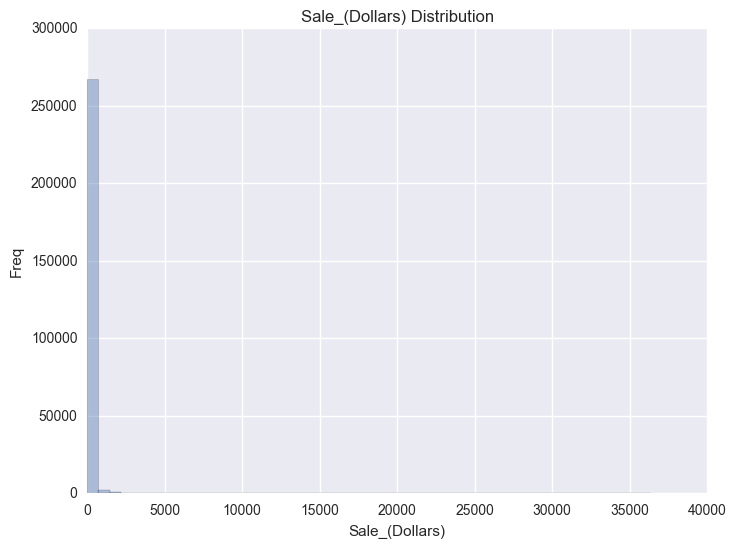

In [39]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot((df_test2['Sale_(Dollars)']),kde=False,ax=ax)
plt.title('Sale_(Dollars) Distribution')
plt.xlabel('Sale_(Dollars)')
plt.ylabel('Freq')


In [40]:
df_test2.dtypes

Date                             object
Store_Number                      int64
City                             object
Zip_Code                         object
County                           object
Category                         object
Category_Name                    object
Vendor_Number                     int64
Item_Number                       int64
Item_Description                 object
Bottle_Volume_(ml)                int64
State_Bottle_Cost               float64
State_Bottle_Retail             float64
Bottles_Sold                      int64
Sale_(Dollars)                  float64
Volume_Sold_(Liters)            float64
Volume_Sold_(Gallons)           float64
Seprate_date             datetime64[ns]
dtype: object

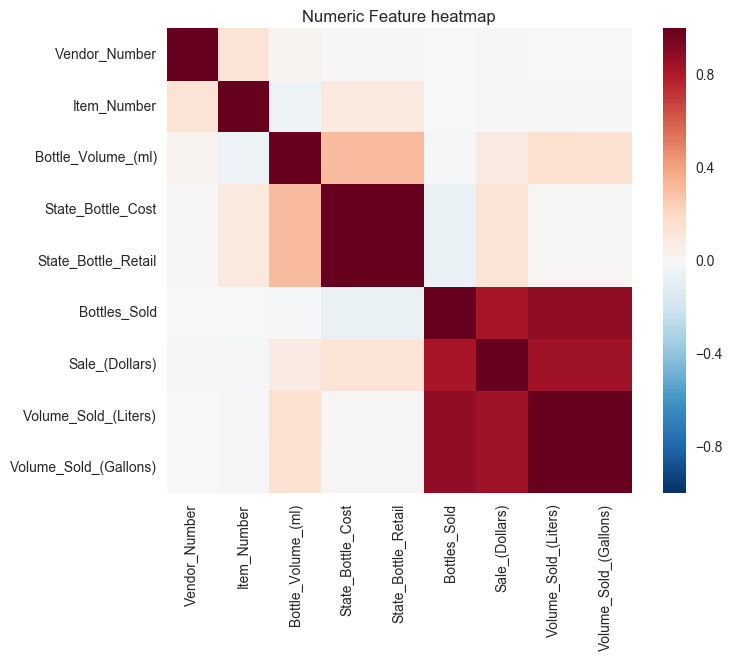

In [41]:
fig,ax = plt.subplots(figsize=(8,6))
correlation = df_test2.select_dtypes(include=['float64','int64']).iloc[:,1:].corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')



In [42]:
corr_dict = correlation['Sale_(Dollars)'].to_dict()
del correlation['Sale_(Dollars)'] 
## correlation with sale price
for key,val in sorted(corr_dict.items(),key=lambda x:-abs(x[1])):
    print('{0} \t : {1}' .format(key,val))

Sale_(Dollars) 	 : 1.0
Volume_Sold_(Gallons) 	 : 0.846431940339
Volume_Sold_(Liters) 	 : 0.846420394642
Bottles_Sold 	 : 0.82544579508
State_Bottle_Retail 	 : 0.136114233589
State_Bottle_Cost 	 : 0.135930689772
Bottle_Volume_(ml) 	 : 0.0824455763378
Vendor_Number 	 : -0.0122770566779
Item_Number 	 : 0.00298701870783


### The Sale_(Dollars) strongly correlate with Volume_Sold_(Gallons),Volume_Sold_(Liters),Bottles_Sold,Bottle_Volume_(ml)

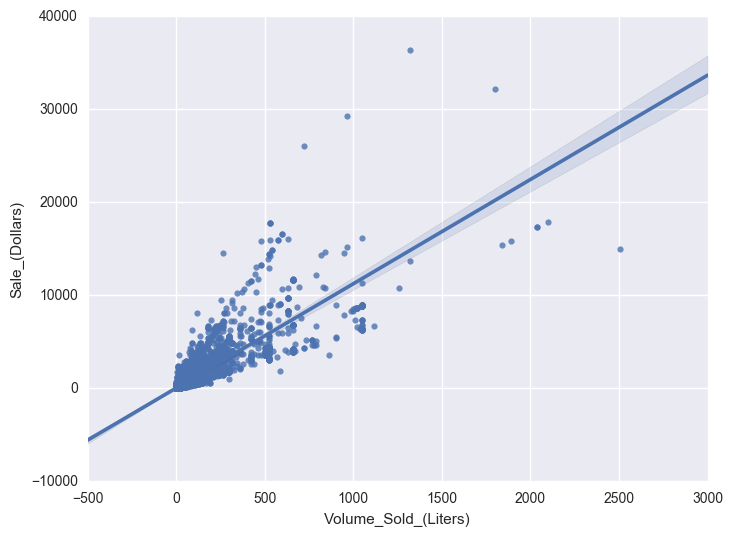

In [43]:
fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'Volume_Sold_(Liters)', y='Sale_(Dollars)' , data=df_test2,ax=ax)



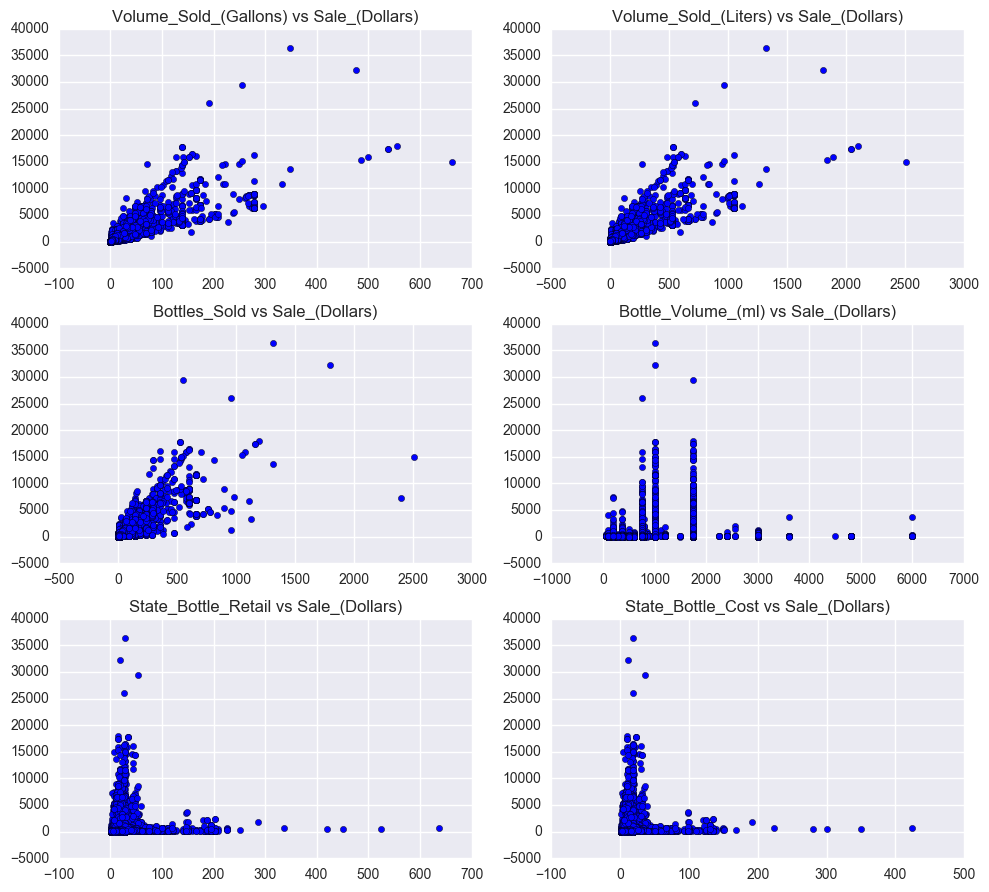

In [45]:
fig,ax = plt.subplots(3,2,figsize=(10,9))
sale_price = df_test2['Sale_(Dollars)'].values


ax[0,0].scatter(df_test2['Volume_Sold_(Gallons)'],sale_price)
ax[0,0].set_title('Volume_Sold_(Gallons) vs Sale_(Dollars)')

ax[0,1].scatter(df_test2['Volume_Sold_(Liters)'],sale_price)
ax[0,1].set_title('Volume_Sold_(Liters) vs Sale_(Dollars)')

ax[1,0].scatter(df_test2['Bottles_Sold'],sale_price)
ax[1,0].set_title('Bottles_Sold vs Sale_(Dollars)')

ax[1,1].scatter(df_test2['Bottle_Volume_(ml)'],sale_price)
ax[1,1].set_title('Bottle_Volume_(ml) vs Sale_(Dollars)')

ax[2,0].scatter(df_test2['State_Bottle_Retail'],sale_price)
ax[2,0].set_title('State_Bottle_Retail vs Sale_(Dollars)')

ax[2,1].scatter(df_test2['State_Bottle_Cost'],sale_price)
ax[2,1].set_title('State_Bottle_Cost vs Sale_(Dollars)')


plt.tight_layout()


## Categorical Feature

In [46]:
print(df_test2.select_dtypes(include=['object']).columns)

Index([u'Date', u'City', u'Zip_Code', u'County', u'Category', u'Category_Name',
       u'Item_Description'],
      dtype='object')


### County

## tableauFigure

# prepare the test and train lists

In [49]:
df_test3= copy.deepcopy(df_test2)

In [51]:
df_test3['year'] = df_test3['Seprate_date'].dt.year

In [52]:
df_test3['month'] = df_test3['Seprate_date'].dt.month

In [54]:
df_test3= df_test3.drop(['Date','City','Zip_Code','Category','Item_Description','Bottle_Volume_(ml)','Bottles_Sold','Volume_Sold_(Gallons)','Seprate_date'], axis=1)

In [61]:
df_test4 = copy.deepcopy(df_test3)

## make dummy variable from county

In [62]:
df_dummies_county  = pd.get_dummies(df_test4['County'])

In [63]:
df_dummies_county.columns = [u'Adair', u'Adams', u'Allamakee', u'Appanoose', u'Audubon', u'Benton',u'Black Hawk', u'Boone', u'Bremer', u'Buchanan', u'Buena Vista',u'Butler', u'Calhoun', u'Carroll', u'Cass', u'Cedar', u'Cerro Gordo',u'Cherokee', u'Chickasaw', u'Clarke', u'Clay', u'Clayton', u'Clinton',u'Crawford', u'Dallas', u'Davis', u'Decatur', u'Delaware',
       u'Des Moines', u'Dickinson', u'Dubuque', u'Emmet', u'Fayette', u'Floyd',
       u'Franklin', u'Fremont', u'Greene', u'Grundy', u'Guthrie', u'Hamilton',
       u'Hancock', u'Hardin', u'Harrison', u'Henry', u'Howard', u'Humboldt',
       u'Ida', u'Iowa', u'Jackson', u'Jasper', u'Jefferson', u'Johnson',
       u'Jones', u'Keokuk', u'Kossuth', u'Lee', u'Linn', u'Louisa', u'Lucas',
       u'Lyon', u'Madison', u'Mahaska', u'Marion', u'Marshall', u'Mills',
       u'Mitchell', u'Monona', u'Monroe', u'Montgomery', u'Muscatine',
       u'O-Brien', u'Osceola', u'Page', u'Palo Alto', u'Plymouth',
       u'Pocahontas', u'Polk', u'Pottawattamie', u'Poweshiek', u'Ringgold',
       u'Sac', u'Scott', u'Shelby', u'Sioux', u'Story', u'Tama', u'Taylor',
       u'UN_COUNTY', u'Union', u'Van Buren', u'Wapello', u'Warren',
       u'Washington', u'Wayne', u'Webster', u'Winnebago', u'Winneshiek',
       u'Woodbury', u'Worth', u'Wright']

In [64]:
df_dummies_county.drop(['Adair'], axis=1, inplace=True)


In [65]:
df_test4 =df_test4.join(df_dummies_county)

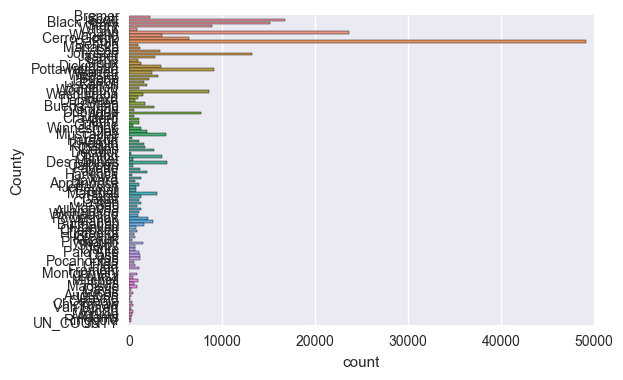

In [66]:
sns.countplot(y='County', data=df_test4)

#### since we have a lot of variables I try to make a model based on quarter sale and county for each store and make a model, predict. if the results was not good I try more variables

In [427]:
df_test5 = copy.deepcopy(df_test4)



In [428]:
df_total_15 = df_test5.groupby('year').get_group(2015)
df_total_16 = df_test5.groupby('year').get_group(2016)



In [430]:
df_total_15 = df_total_15.drop(['Category_Name','Vendor_Number','Item_Number','State_Bottle_Cost','State_Bottle_Retail','Volume_Sold_(Liters)','year'], axis=1)
df_total_16 = df_total_16.drop(['Category_Name','Vendor_Number','Item_Number','State_Bottle_Cost','State_Bottle_Retail','Volume_Sold_(Liters)','year'], axis=1)


## I make 3 different dataframes and merge them together

![prjprj](prjprj.png)


In [432]:
df_total_15_group = df_total_15.groupby(by=['Store_Number','month'])['Sale_(Dollars)'].sum()
d1 = pd.DataFrame(df_total_15_group)
d1 = d1.reset_index() #Nathen help me withthis command
d1.columns=['Store_Number','month','Sale_total_month']
d1
d2_2015_month_eachstore = copy.deepcopy(d1)



In [434]:
e1 = d1[d1['Store_Number'].notnull() & (d1['month'] < 4)]
e2 = e1.groupby(by=['Store_Number'])['Sale_total_month'].sum()
d1 = pd.DataFrame(e2)
d1 = d1.reset_index()

## I have quarter sale for each store


In [ ]:

### dataset for total sale of the year 2015 each store


In [438]:
df_total_15_group2 = df_total_15.groupby(by=['Store_Number'])['Sale_(Dollars)'].sum()
d2=pd.DataFrame(df_total_15_group2)
d2 = d2.reset_index()
d2.columns=['Store_Number','Sale_total_year']
d2_2015_data_totalyear = copy.deepcopy(d2)


### dataset for total sale of the year 2015 each store



## merging two dataframs and filing the missing value (thanks to Joseph)


In [537]:
common_cols = list(set(d2.columns) & set(d1.columns))



In [538]:
mergedata=pd.merge(d2, d1, on=common_cols, how='outer')



In [541]:
mergedata.isnull().sum()



Store_Number        0
Sale_total_year     0
Sale_total_month    0
dtype: int64

In [767]:
mergedata['Sale_total_month'] = mergedata['Sale_total_month'].fillna(10)
mergedata.isnull().sum()

mergedata.head()

,Store_Number,Sale_total_year,Sale_total_month
0,2106,146326.22,39287.29
1,2113,9310.22,2833.25
2,2130,111871.43,24272.57
3,2152,7721.08,2003.46
4,2178,24324.18,5856.41


## making the third dataframe (county)

In [542]:
df_total_15.shape



(218594, 103)

In [641]:
df_county_df = df_total_15.drop(['County','Sale_(Dollars)','month'], axis=1)
df_county_df.shape



(218594, 100)

In [ ]:
df_county_df=df_county_df.sort('Store_Number').drop_duplicates(subset=['Store_Number'], take_last=True)



In [768]:
finald=pd.merge(mergedata, df_county_df,  how='outer')

finald.head()


,Store_Number,Sale_total_year,Sale_total_month,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,2106,146326.22,39287.29,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2113,9310.22,2833.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2130,111871.43,24272.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2152,7721.08,2003.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2178,24324.18,5856.41,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [578]:

data_finale_15_model = copy.deepcopy(finald)


### making a model

In [579]:
data_finale_15_model.columns

Index([    u'Store_Number',  u'Sale_total_year', u'Sale_total_month',
                  u'Adams',        u'Allamakee',        u'Appanoose',
                u'Audubon',           u'Benton',       u'Black Hawk',
                  u'Boone',
       ...
                u'Wapello',           u'Warren',       u'Washington',
                  u'Wayne',          u'Webster',        u'Winnebago',
             u'Winneshiek',         u'Woodbury',            u'Worth',
                 u'Wright'],
      dtype='object', length=102)

In [580]:
data_finale_15_model.shape

(1372, 102)

In [601]:
X=  data_finale_15_model.drop(['Store_Number','Sale_total_year'], axis=1)
#X=data_finale_15_model['Sale_total_month']
type(X)
X.head()



,Sale_total_month,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
0,39287.29,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2833.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,24272.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5856.41,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#make a train test , and model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [602]:
y = data_finale_15_model['Sale_total_year'].astype('int')
type(X)
print type(y.values)

<type 'numpy.ndarray'>


In [666]:
type(X_test)

pandas.core.frame.DataFrame

## LinearRegression, X train and Y train

In [769]:
import sklearn.linear_model as lm
linreg = lm.LinearRegression()
#linreg.fit(np.transpose(np.matrix(X_train)), np.transpose(np.matrix(y_train)))
linreg.fit(X_train, y_train)
Y_pred = linreg.predict(X_test)

In [619]:
#linreg.score(X_test.reshape(X_test.shape[0], 1), Y_pred)
linreg.score(X_test, Y_pred)

1.0

## create 2016 dataset features+target for the first 3 months 2016

## the first dataset

In [770]:
df_total_16_group = df_total_16.groupby(by=['Store_Number','month'])['Sale_(Dollars)'].sum()
d11 = pd.DataFrame(df_total_16_group)
d11 = d11.reset_index() #Nathen help me withthis command
d11.columns=['Store_Number','month','Sale_total_month']

d2_2016_month_eachstore = copy.deepcopy(d11)
e11 = d11[d11['Store_Number'].notnull() & (d11['month'] < 4)]
e21 = e11.groupby(by=['Store_Number'])['Sale_total_month'].sum()
d11 = pd.DataFrame(e21)
d11 = d11.reset_index()

## I have quarter sale for each store

d11.head()

,Store_Number,Sale_total_month
0,2106,30523.75
1,2113,2065.90
2,2130,27856.11
3,2152,1376.43
4,2178,5588.50


In [771]:
df_total_16_group2 = df_total_16.groupby(by=['Store_Number'])['Sale_(Dollars)'].sum()
d21=pd.DataFrame(df_total_16_group2)
d21 = d21.reset_index()
d21.columns=['Store_Number','Sale_total_year']
d2_2016_data_totalyear = copy.deepcopy(d21)

d21.head()

,Store_Number,Sale_total_year
0,2106,30523.75
1,2113,2065.90
2,2130,27856.11
3,2152,1376.43
4,2178,5588.50


In [ ]:
## statistical analysis
df_county_df_16 = df_total_16.drop(['County','Sale_(Dollars)','month'], axis=1)
df_county_df_16.shape
df_county_df_16=df_county_df_16.sort('Store_Number').drop_duplicates(subset=['Store_Number'], take_last=True)
finald_16=pd.merge(  df_county_df,d11,  how='outer')
finald_16

In [ ]:
## using for my dataset to predict
df_county_df_16 = df_total_16.drop(['County','Sale_(Dollars)','month'], axis=1)
df_county_df_16.shape
df_county_df_16=df_county_df_16.sort('Store_Number').drop_duplicates(subset=['Store_Number'], take_last=True)
finald_16_new=pd.merge(  d11,df_county_df_16,  how='outer')
finald_16_new

## 28 new stores open in the first quarter.

## 63 stores closes during the first quarter or no data 

In [687]:
finald_16_new.columns

Index([    u'Store_Number', u'Sale_total_month',            u'Adams',
              u'Allamakee',        u'Appanoose',          u'Audubon',
                 u'Benton',       u'Black Hawk',            u'Boone',
                 u'Bremer',
       ...
                u'Wapello',           u'Warren',       u'Washington',
                  u'Wayne',          u'Webster',        u'Winnebago',
             u'Winneshiek',         u'Woodbury',            u'Worth',
                 u'Wright'],
      dtype='object', length=101)

In [688]:
X_test_16 = finald_16_new
X_test_16=pd.DataFrame(X_test_16)

## predict the total sale of 2016

In [713]:
#pp=np.transpose(np.matrix(X_test_16))
Y_pred_16 = linreg.predict(X_test_16_drop)

In [695]:
Y_pred_16

array([ 137868.02563203,   10334.94780629,  125915.62436906, ...,
          1256.12902494,    2080.9022419 ,    4075.20770696])

In [696]:
len(Y_pred_16)

1309

### prepare a dataset for store and county